In [1]:
#Data and Statistics Packages
import numpy as np
import pandas as pd

In [2]:
#Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#New Packages
from sklearn.decomposition import PCA
from time import time

In [5]:
#Other packages
pd.set_option('display.max_columns', 35000)
import warnings
warnings.filterwarnings("ignore")

In [7]:
cardio_df = pd.read_csv('cardio_train.csv', encoding='unicode_escape')
cardio_df = cardio_df[cardio_df.columns.difference(['index'])]
cardio_df.head(70000)

,Active,Age,Alco,Ap_Hi,Ap_lo,Cholesterol,Gender,Gluc,Height,Smoke,Weight,cardio,cardio_train
0,1,18393,0,110,80,1,2,1,168,0,62.0,0,0
1,1,20228,0,140,90,3,1,1,156,0,85.0,1,1
2,0,18857,0,130,70,3,1,1,165,0,64.0,1,2
3,1,17623,0,150,100,1,2,1,169,0,82.0,1,3
4,0,17474,0,100,60,1,1,1,156,0,56.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,19240,0,120,80,1,2,1,168,1,76.0,0,99993
69996,1,22601,0,140,90,2,1,2,158,0,126.0,1,99995
69997,0,19066,1,180,90,3,2,1,183,0,105.0,1,99996
69998,0,22431,0,135,80,1,1,2,163,0,72.0,1,99998


In [8]:
cardio_df.describe()

,Active,Age,Alco,Ap_Hi,Ap_lo,Cholesterol,Gender,Gluc,Height,Smoke,Weight,cardio,cardio_train
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700,49972.419900
std,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003,28851.302323
min,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000,0.000000
25%,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000,25006.750000
50%,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000,50001.500000
75%,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000,74889.250000
max,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000,99999.000000


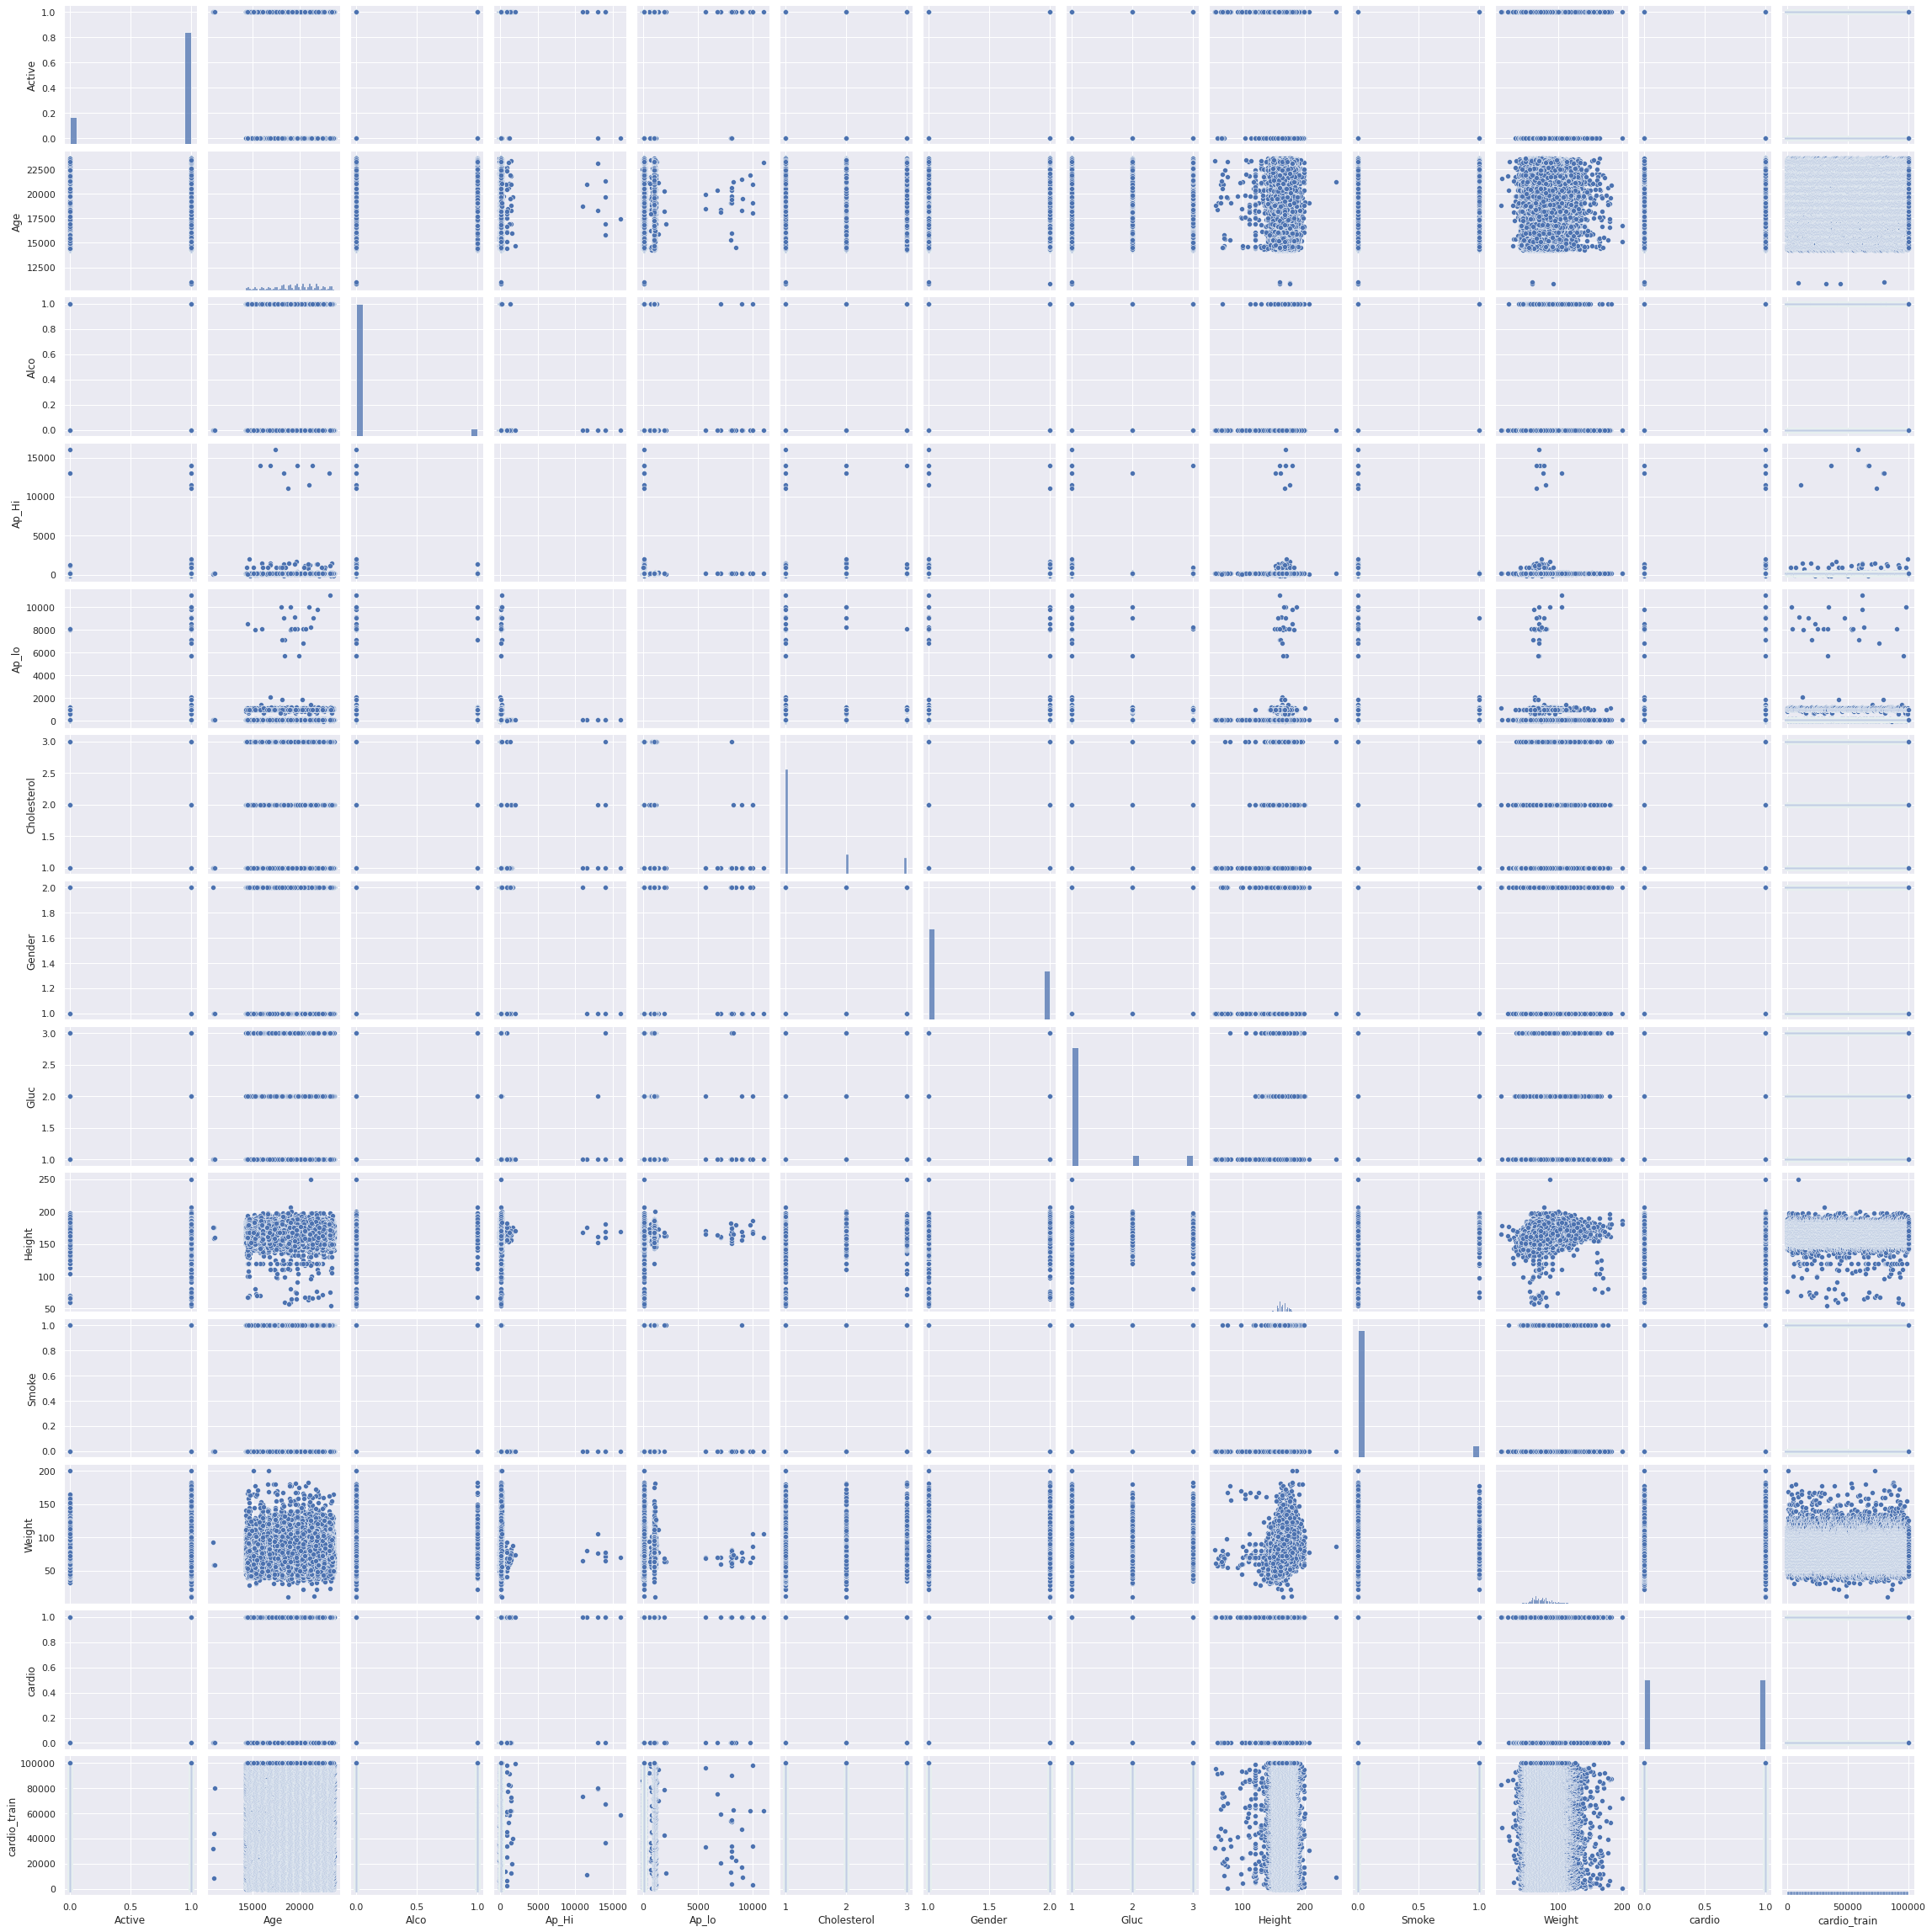

In [9]:
sns.pairplot(cardio_df);

In [ ]:
#make cardio and cholesterol catergorical variables
cardio_df
cardio_df['cardio']
pd.Categorical(cardio_df['cardio'])
pd.Categorical(cardio_df['Cholesterol'])
print(cardio_df['cardio'])
print(cardio_df['Cholesterol'])

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64
0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: Cholesterol, Length: 70000, dtype: int64


In [10]:
#Separating quantitative predictors
cardio = cardio_df['cardio']
Cholesterol = cardio_df['Cholesterol']
quant_df = cardio_df[cardio_df.columns.difference(['cardio'])]
quant_df = cardio_df[cardio_df.columns.difference(['Cholesterol'])]
quant_df=cardio_df[['Height','Weight','Ap_Hi','Ap_lo',]]

#Standardization
quant_scaled = StandardScaler().fit_transform(quant_df)
cardio_df_scaled = pd.DataFrame(quant_scaled, columns=quant_df.columns)

#Bringing it back
cardio_df_scaled['cardio'] = cardio_df['cardio']
cardio_df_scaled['Cholesterol'] = cardio_df['Cholesterol']
cardio_df_scaled.head()

,Height,Weight,Ap_Hi,Ap_lo,cardio,Cholesterol
0,0.443452,-0.847873,-0.122182,-0.088238,0,1
1,-1.018168,0.749831,0.072610,-0.035180,1,3
2,0.078047,-0.708942,0.007679,-0.141297,1,3
3,0.565254,0.541435,0.137541,0.017879,1,1
4,-1.018168,-1.264666,-0.187113,-0.194356,0,1


In [11]:
cardio_df_scaled.describe()

,Height,Weight,Ap_Hi,Ap_lo,cardio,Cholesterol
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,70000.000000
mean,1.768550e-15,-3.450534e-16,-1.518658e-15,-7.473280e-16,0.499700,1.366871
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.500003,0.680250
min,-1.332014e+01,-4.460075e+00,-1.810381e+00,-8.841161e-01,0.000000,1.000000
25%,-6.527630e-01,-6.394770e-01,-5.725127e-02,-8.823850e-02,0.000000,1.000000
50%,7.804703e-02,-1.532192e-01,-5.725127e-02,-8.823850e-02,0.000000,1.000000
75%,6.870554e-01,5.414349e-01,7.261016e-02,-3.517999e-02,1.000000,2.000000
max,1.043119e+01,8.738353e+00,1.031826e+02,5.785165e+01,1.000000,3.000000


In [12]:
#Drop model again
cardio_df_scaled = cardio_df_scaled[cardio_df_scaled.columns.difference(['cardio'])]
cardio_df_scaled = cardio_df_scaled[cardio_df_scaled.columns.difference(['Cholesterol'])]
quant_df = cardio_df_scaled

#Fitting the PCA object onto our dataframe
pca = PCA().fit(quant_df)

#transforming dataframe
quant_df_pca = pca.transform(quant_df)

print('Original dimensions:', quant_df.shape)
print('PCA dimensions:     ', quant_df_pca.shape)

Original dimensions: (70000, 4)
PCA dimensions:      (70000, 4)


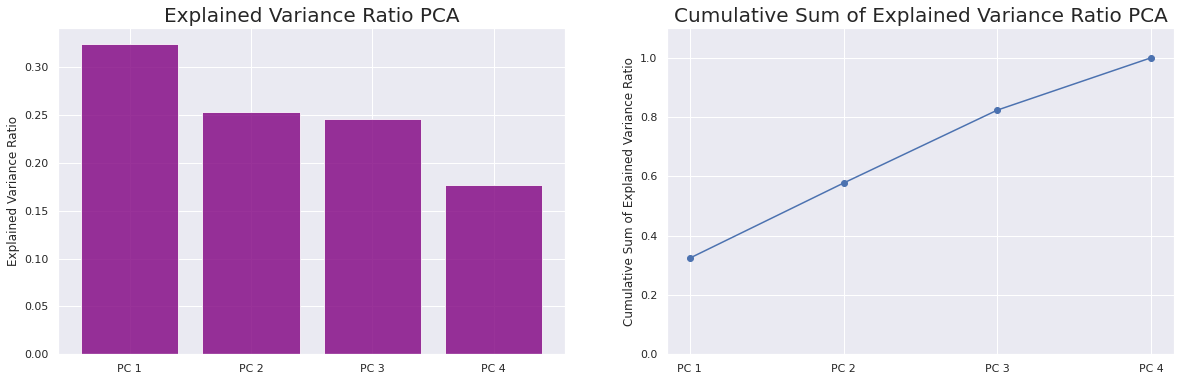

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, color='purple', alpha=0.8)
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}' .format(i+1) for i in range(len(ratio))])
ax1.set_ylabel('Explained Variance Ratio')

#ratio [0] = 0
ratio = pca.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')

ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)

ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}' .format(i+1) for i in range(len(ratio))])
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [14]:
for i, comp in enumerate(pca.components_):
  expression = 'Z_{}'.format(i+1)
  for c, x in zip(comp, quant_df.columns):
    if c < 0:
      expression += str(np.round(c,2)) + '*' + x + ''
    else:
      expression += '+' + str(np.round(c,2)) + '*' + x + ''
  print(expression + '\n')  

Z_1+0.09*Ap_Hi+0.12*Ap_lo+0.69*Height+0.7*Weight

Z_2+0.71*Ap_Hi+0.69*Ap_lo-0.18*Height-0.04*Weight

Z_3+0.7*Ap_Hi-0.71*Ap_lo+0.03*Height+0.0*Weight

Z_4-0.06*Ap_Hi-0.09*Ap_lo-0.7*Height+0.71*Weight



In [15]:
vec1 = pca.components_[0] 
vec2 = pca.components_[1]

#print
print('The dot product between the first two principal components is',np.round(np.dot(vec1, vec2),5))
print('The length of the first principal component is',np.round(np.dot(vec1, vec1),5))\

The dot product between the first two principal components is 0.0
The length of the first principal component is 1.0


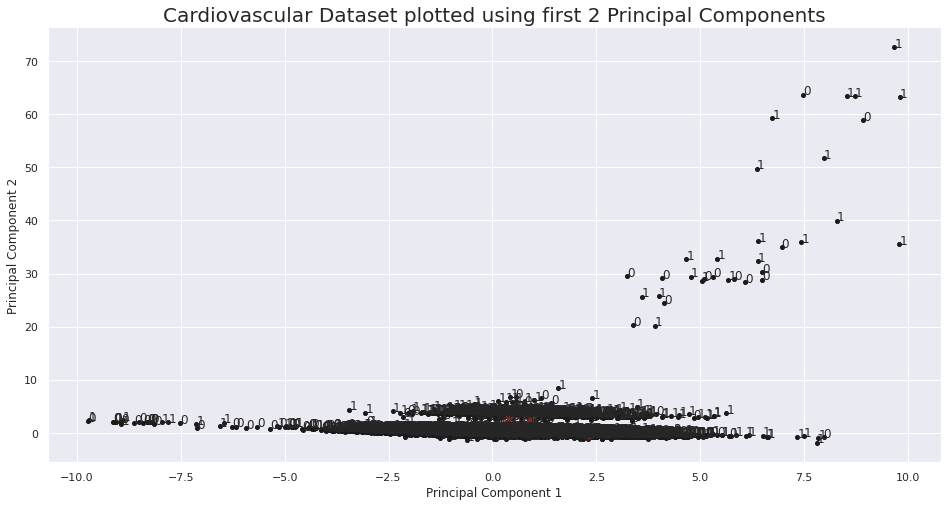

In [18]:
# plot vectors from center
vecs = pca.components_[0:10].T *2

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(quant_df_pca[:,0], quant_df_pca[:,1], 'ok', markersize=4)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Cardiovascular Dataset plotted using first 2 Principal Components', fontsize=20)

#plotting arrowheads of the original axes projected on the 2D PCA space
for i, vec in enumerate(vecs):
  ax.arrow(0,0,vec[0],vec[1], color='red', head_width=0.2)
  s = 1.3
  ax.annotate(quant_df.columns[i], (s*vec[0], s*vec[1]), color='brown')

#annotating text for cardiovascular disease
for i, txt in enumerate(cardio_df['cardio']):
  ax.annotate(txt, (quant_df_pca[:,0][i], quant_df_pca[:,1][i]), size=12)